In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.dummy import DummyRegressor


In [30]:
df = pd.read_csv('three-models.csv')
df.head(2)

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52


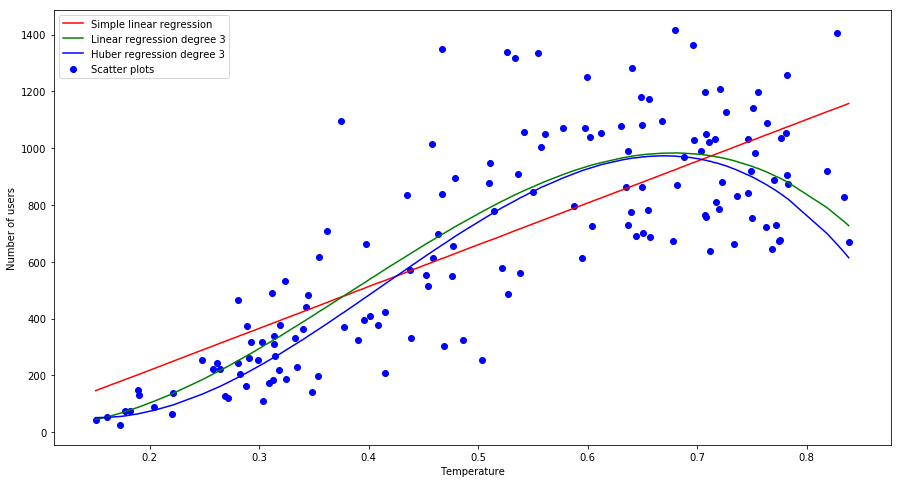

In [31]:
x = df.temp.values
y = df.users.values

fig,ax = plt.subplots(figsize=(15,8))

ax.scatter(x,y,c='b',label='Scatter plots')

ax.plot(x,df.pred_lr.values,c='r',label='Simple linear regression')
ax.plot(x,df.pred_poly3.values,c='g',label='Linear regression degree 3')
ax.plot(x,df.pred_huber3.values,c='b',label='Huber regression degree 3')

plt.xlabel("Temperature")
plt.ylabel("Number of users")
plt.legend()
plt.show()


In [32]:
# Calculate the RMSE factor

def RMSE(y,y_pred):
    return int(np.sqrt(np.mean(np.square(y - y_pred))))

def MAE(y,y_pred):
    return int(np.mean(np.abs(y-y_pred)))

  
    

rmse_lr = RMSE(y,df.pred_lr.values)
rmse_poly3 = RMSE(y,df.pred_poly3.values)
rmse_huber3 = RMSE(y,df.pred_huber3.values)

print("RMSE linear regression:",rmse_lr)
print("RMSE polyfit (deg 3):",rmse_poly3)
print("RMSE linear regression:",rmse_huber3)

mae_lr = MAE(y,df.pred_lr.values)
mae_poly3 = MAE(y,df.pred_poly3.values)
mae_huber3 = MAE(y,df.pred_huber3.values)

print("MAE linear regression:",mae_lr)
print("MAE polyfit (deg 3):",mae_poly3)
print("MAE linear regression:",mae_huber3)



RMSE linear regression: 232
RMSE polyfit (deg 3): 210
RMSE linear regression: 215
MAE linear regression: 186
MAE polyfit (deg 3): 161
MAE linear regression: 164


In [44]:
# Create the DummyRegressor object with 'mean' strategy
dummy = DummyRegressor(strategy='mean')

# Fit the estimator
dummy.fit(x[:, np.newaxis], y);

# Vector with predictions from the baseline
pred_baseline_mean = dummy.predict(x[:, np.newaxis])
rmse_baseline_mean = RMSE(y, pred_baseline_mean)


In [47]:
# Create the DummyRegressor object with 'median' strategy
dummy = DummyRegressor(strategy='median')

# Fit the estimator
dummy.fit(x[:, np.newaxis], y);

# Vector with predictions from the baseline
pred_baseline_median = dummy.predict(x[:, np.newaxis])
rmse_baseline_median = RMSE(y, pred_baseline_median)


371

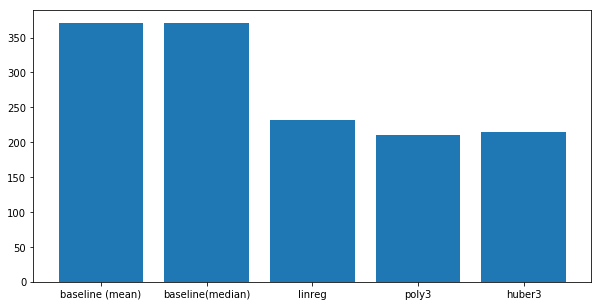

In [46]:
# Bar chart
plt.figure(figsize=(10,5))
plt.bar([1, 2, 3, 4, 5], [rmse_baseline_mean, rmse_baseline_median, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4, 5], ['baseline (mean)', 'baseline(median)', 'linreg', 'poly3', 'huber3'])

plt.show()

